<a href="https://colab.research.google.com/github/alxmzr/Colab/blob/main/ASTRO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyswisseph
# !pip install pandas
# !pip install matplotlib

In [ ]:
import swisseph as swe
import datetime
import math

# Установка пути к эфемеридам (можно оставить пустым, если используешь встроенные)
swe.set_ephe_path('.')

planets = {
    "Sun": swe.SUN,
    "Moon": swe.MOON,
    "Mercury": swe.MERCURY,
    "Venus": swe.VENUS,
    "Mars": swe.MARS,
    "Jupiter": swe.JUPITER,
    "Saturn": swe.SATURN,
    "Uranus": swe.URANUS,
    "Neptune": swe.NEPTUNE,
    "Pluto": swe.PLUTO
}

aspects = {
    "Conjunction": 0,
    "Square": 90,
    "Trine": 120,
    "Opposition": 180
}
orb = 1.0

def get_longitude(jd, planet):
    pos, _ = swe.calc_ut(jd, planet)
    return pos[0]

def calc_aspects(date):
    jd_start = swe.julday(date.year, date.month, date.day, 0.0)
    print(f"Astral Aspects for {date.strftime('%Y-%m-%d')}")

    for p1_name, p1 in planets.items():
        for p2_name, p2 in planets.items():
            if p1 >= p2:
                continue
            lon1 = get_longitude(jd_start, p1)
            lon2 = get_longitude(jd_start, p2)
            angle = abs(lon1 - lon2)
            angle = angle if angle <= 180 else 360 - angle

            for asp_name, asp_angle in aspects.items():
                if abs(angle - asp_angle) <= orb:
                    print(f"{p1_name} {asp_name} {p2_name} ~ Angle: {angle:.2f}°")

# Проверка на дату
calc_aspects(datetime.date(2022, 10, 26))

Astral Aspects for 2022-10-26
Sun Conjunction Venus ~ Angle: 0.80°


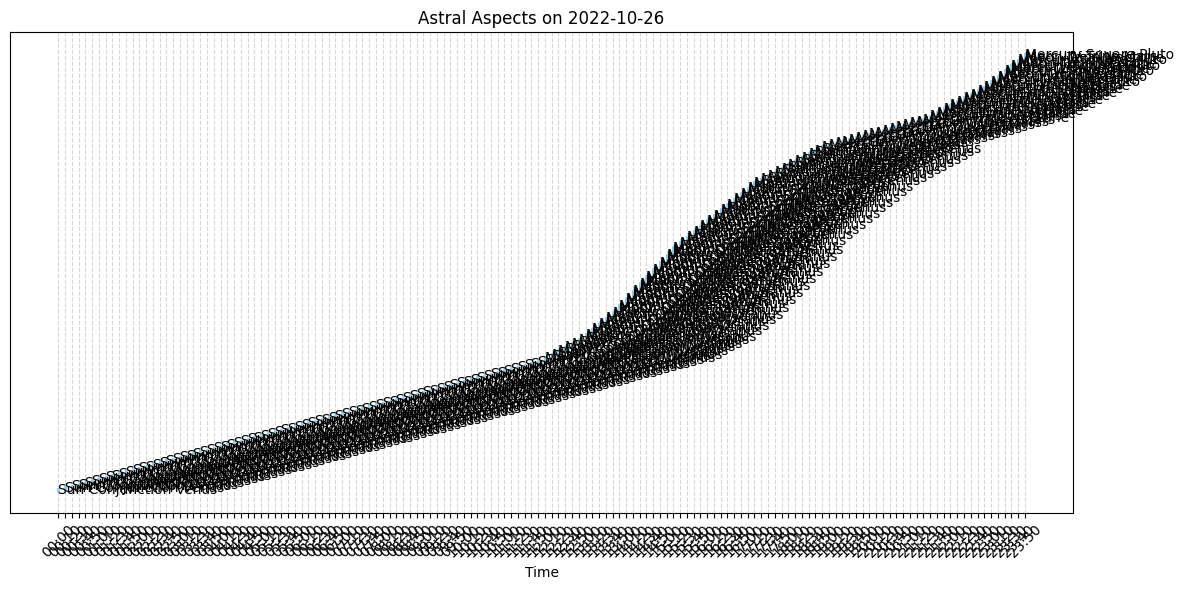

In [ ]:
import swisseph as swe
import datetime
import matplotlib.pyplot as plt

swe.set_ephe_path('.')

planets = {
    "Sun": swe.SUN,
    "Moon": swe.MOON,
    "Mercury": swe.MERCURY,
    "Venus": swe.VENUS,
    "Mars": swe.MARS,
    "Jupiter": swe.JUPITER,
    "Saturn": swe.SATURN,
    "Uranus": swe.URANUS,
    "Neptune": swe.NEPTUNE,
    "Pluto": swe.PLUTO
}

aspects = {
    "Conjunction": 0,
    "Square": 90,
    "Trine": 120,
    "Opposition": 180
}
orb = 1.0

def get_longitude(jd, planet):
    pos, _ = swe.calc_ut(jd, planet)
    return pos[0]

def find_aspects_for_day(date):
    jd_base = swe.julday(date.year, date.month, date.day, 0.0)
    results = []

    for hour in range(0, 24):
        for minute in range(0, 60, 10):  # шаг 10 минут
            jd = jd_base + (hour + minute/60.0) / 24.0
            for p1_name, p1 in planets.items():
                for p2_name, p2 in planets.items():
                    if p1 >= p2:
                        continue
                    lon1 = get_longitude(jd, p1)
                    lon2 = get_longitude(jd, p2)
                    angle = abs(lon1 - lon2)
                    angle = angle if angle <= 180 else 360 - angle

                    for asp_name, asp_angle in aspects.items():
                        if abs(angle - asp_angle) <= orb:
                            time_str = f"{hour:02d}:{minute:02d}"
                            results.append((time_str, p1_name, asp_name, p2_name))
    return results

def plot_aspects(results, date):
    plt.figure(figsize=(12, 6))
    y_labels = []
    y_ticks = []

    for i, (time_str, p1, asp, p2) in enumerate(results):
        y = i
        plt.plot([time_str, time_str], [y - 0.4, y + 0.4], color="skyblue", linewidth=2)
        plt.text(time_str, y, f"{p1} {asp} {p2}", va='center', ha='left', fontsize=10)
        y_labels.append(f"{p1}-{p2}")
        y_ticks.append(y)

    plt.title(f"Astral Aspects on {date.strftime('%Y-%m-%d')}")
    plt.xlabel("Time")
    plt.yticks([])
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# Использование
date = datetime.date(2022, 10, 26)
results = find_aspects_for_day(date)
plot_aspects(results, date)
